# Linear Regression

Prepare the overall environment.

In [7]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
# Minimize the function
from scipy.optimize import fmin_bfgs
# Fit the regularized logistic regression
from sklearn.linear_model import LogisticRegression
# Load .mat file
import scipy.io as sio
# This allows plots to appear directly in the notebook
import requests
import StringIO
import zipfile
import scipy.stats 
%matplotlib inline

## Linear regression with one variable

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

You would like to use this data to help you select which city to expand
to next.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for prot indicates a loss.

#### Prepare the data

In [16]:
data1 = pd.read_csv('https://raw.githubusercontent.com/TianYe00/Machine_Learning_exercises/master/ex1data1.txt',
                    header = None)
data1.columns = ['x', 'y']
m = data1.shape[0]    #fastest method to get the number of rows

#### Scatter plot of `data1`

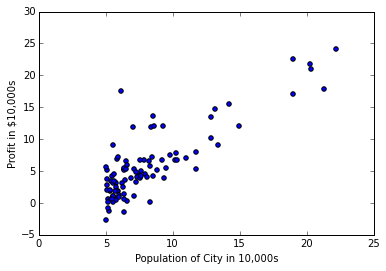

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data1['x'], data1['y'])
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')

#### Three methods to do linear regression

In [ ]:
#First method
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='y ~ x', data = data1).fit()
lm1.params
lm1.summary
#Second method
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression(fit_intercept=True).fit(data1['x'].reshape(97,1),data1['y'].reshape(97,1))  
#Notice that data1['x'].shap is (97,) and this function require (97,1)
lm2.coef_
lm2.intercept_

#When the column rank of x is not full, then we use patsy.dmatrics to get design matrix.
from patsy import dmatrices
y, x = dmatrices('y ~ x', data1)
betas = np.linalg.lstsq(y, x)

#### Gradient descent

Define the function `gradient_descent` to do gradient descent.

In [ ]:
def gradient_descent(alpha, x, y, numIterations, thres = 0.001):
    m = x.shape[0] # number of samples
    theta = np.ones(x.shape[1])
    J1 = 0.
    J2 = 100.
    for iter in range(0, numIterations):
        if abs(J2 - J1) < thres:
            break
        J2 = J1
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J1 = np.sum(loss ** 2) / (2 * m)  # cost
        print "iter %s | J: %.3f" % (iter, J1)      
        gradient = np.dot(x.T, loss) / m         
        theta = theta - alpha * gradient  # update
    return theta

Execute gradient descent to compute the coefficients.

In [ ]:
x = np.c_[np.ones(m), data1['x'].reshape(97,1)]
y = data1['y']
theta = gradient_descent(0.01, x, y, 1000)  
#or theta = gradient_descent(alpha=0.01, x = x0, y = y0, numIterations=1000)

## Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

The file ex1data2.txt contains a training set of housing prices in Port-
land, Oregon. The first column is the size of the house (in square feet), the
second column is the number of bedrooms, and the third column is the price
of the house.

#### Prepare the data

In [ ]:
data2 = pd.read_csv('https://raw.githubusercontent.com/TianYe00/Machine_Learning_exercises/master/ex1data2.txt',
                    header = None)
data2.columns = ['x1','x2','y']
m = data2.shape[0]
data2 = data2.astype(np.float64) #Normally when data type is int, we transform it to float for following analysis.

#### Feature normalization

In [ ]:
from sklearn import preprocessing
x_norm = preprocessing.scale(data2[['x1','x2']], axis = 0)

#### Gradient descent

In [ ]:
x = np.c_[np.ones(m), x_norm]
y = data2['y']
theta2 = gradient_descent(0.02, x, y, 1000)  

#### Normal Equation

$\theta = (X^{T}X)^{-1}X^{T}y$

In [ ]:
theta = inv(np.dot(x.T, x)).dot(x.T).dot(y)

#### Prediction

When we do prediction at $x^{new}$, we should do the same normalization on it.

# Logistic Regression

## Nomal logistic regression

Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.

Your task is to build a classication model that estimates an applicant's
probability of admission based the scores from those two exams.

#### Prepare the data

In [3]:
data1 = pd.read_csv('https://raw.githubusercontent.com/TianYe00/Machine_Learning_exercises/master/ex2data1.txt',
                    header = None)
data1.columns = ['x1', 'x2', 'y']
m = data1.shape[0]

#### Scatter plot of `data1`

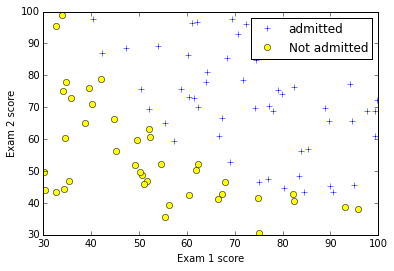

In [15]:
ind = data1['y'] == 1
pos, = plt.plot(data1.ix[ind]['x1'], data1.ix[ind]['x2'], 'o', marker = '+')
# Put a white cross over some of the data.
no, = plt.plot(data1.ix[~ind]['x1'], data1.ix[~ind]['x2'], 'o', c = 'yellow')
plt.legend([pos, no], ["admitted", "Not admitted"], numpoints = 1)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

#### Sigmoid function

In [ ]:
sigmoid = lambda(x): 1.0/(1.0 + exp(-x))

#### Cost and its gradient functions

In [ ]:
def logistic_cost(theta, X, y):
    m = np.float64(X.shape[0]) #be careful when data type is int
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.dot(log(h)) - (1 - y).dot(log(1 - h)))
    return J  
def logistic_grad(theta, X, y):
    m = np.float64(X.shape[0]) #be careful when data type is int
    h = sigmoid(X.dot(theta))
    grad = (1/m) * (h - y).dot(X)
    return grad

In [ ]:
X = np.c_[np.ones(m), data1[['x1', 'x2']]]
init_theta = np.array([1, 2, 3])  #this value cannot be close to 0 when we use BFGS algorithm
res = fmin_bfgs(logistic_cost, init_theta, fprime = logistic_grad, args=(X, data1['y']))
#We can also use sklearn.linear_model.LogisticRegression
from sklearn.linear_model import LogisticRegression


#### Prediction

In [ ]:
def predict(X, theta):
    p = sigmoid(X.dot(theta))
    return p

## Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.

Suppose you are the product manager of the factory and you have the
test results for some microchips on two dierent tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

#### Prepare data

In [21]:
data2 = pd.read_csv('https://raw.githubusercontent.com/TianYe00/Machine_Learning_exercises/master/ex2data2.txt',
                    header = None)
data2.columns = ['x1', 'x2', 'y']
m = data2.shape[0]

#### Visualizing the data

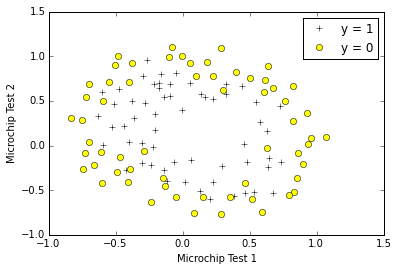

In [23]:
ind = data2['y'] == 1
pos, = plt.plot(data2.ix[ind]['x1'], data2.ix[ind]['x2'], 'o', marker = '+', c = 'black')
# Put a white cross over some of the data.
no, = plt.plot(data2.ix[~ind]['x1'], data2.ix[~ind]['x2'], 'o', c = 'yellow')
plt.legend([pos, no], ["y = 1", "y = 0"], numpoints = 1)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

#### Feature mapping

In [ ]:
def mapFeature(X, degree):   #X should have type pandas.DataFrame
    n = X.shape[1]
    X_new = X
    for i in xrange(2, degree+1):
        for j in xrange(i+1):
            for a in xrange(n - 1):
                X_new = np.c_[X_new, (X.icol(a) ** (i - j) * X.icol(a + 1) ** (j))]
    return X_new         
# Try degree is 6.
X = mapFeature(data2[['x1', 'x2']], 6)

#### Fit the model

In [ ]:
#$\lambda = 2$
C = 1./2
res = LogisticRegression(C=C, penalty='l2').fit(X, data2['y'])
#Estimated coefficients
res.coef_
#Prediction
res.predict(X[1, :])

# Neural Networks for Multi-class Classification

For this exercise, you will use logistic regression and neural networks to recognize handwritten digits (from 0 to 9). Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. This exercise will show you how the methods you’ve learned can be used for this classification task.

There are 5000 training examples in ex3data1.mat, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.

#### Prepare data

In [ ]:
%cd /Users/newuser/Desktop/Research(Tian_Ye)/online_course/Machine_Learning/machine-learning-ex4/ex4
data = sio.loadmat('ex4data1.mat')
X = data['X']
m = X.shape[0]
y = data['y']     #y is the vector with each element from 1 to 10 representing 1,...,9,0 repectively.
num_labels = 10    #number of classes
#Recode y as a 10 * 5000 matrix
yk = np.zeros([m, num_labels])
for i in range(m):
    yk[i, y[i]-1] = 1

#### Fit the model with `neurolab` package

In [ ]:
#cannot work well
import neurolab as nl
mm = np.c_[X.min(axis = 0)-1e-5, X.max(axis = 0)+1e-5]
#25 nodes are in the hidden layer, 10 units in the output.
#Apply logsig function in matlab, which is sigmoid function.
#Since we have two layers that need transf, we should pass two transf.
net = nl.net.newff(mm, [25, 10], transf = [nl.trans.LogSig()] * 2)
#By default the train function is neurolab.train.train_gdx(),
#which is Gradient descent with momentum backpropagation and adaptive lr(learning rate).
error1 = net.train(X, yk)


# Anomaly Detection

In this exercise, you will implement an anomaly detection algorithm to detect
anomalous behavior in server computers. The features measure the through-
put ($\frac{mb}{s}$) and latency ($ms$) of response of each server. While your servers
were operating, you collected $m = 307$ examples of how they were behaving,
and thus have an unlabeled dataset $\{x^{(1)},...,x^{(m)}\}$. You suspect that the
vast majority of these examples are \normal" (non-anomalous) examples of
the servers operating normally, but there might also be some examples of
servers acting anomalously within this dataset.

You will use a Gaussian model to detect anomalous examples in your
dataset. You will first start on a 2D dataset that will allow you to visualize
what the algorithm is doing. On that dataset you will fit a Gaussian distribution and then find values that have very low probability and hence can
be considered anomalies. After that, you will apply the anomaly detection
algorithm to a larger dataset with many dimensions.

#### Prepare data

In [ ]:
%cd /Users/sunruimin/Desktop/Research(Tian_Ye)/online_course/Machine_Learning/machine-learning-ex8/ex8
data = sio.loadmat('ex8data1.mat')
X = data['X']
# Data in validation group.
Xv = data['Xval']
yv = data['yval']

#### Gaussion detection

We assume that $x^{(i)}$s are independent. Then we estimate Gaussian parameters.

In [ ]:
Xmean = X.mean(axis = 0)
Xvar = X.var(axis = 0)

#### Selecting the threshold

The low probability examples are
more likely to be the anomalies in our dataset. One way to determine which
examples are anomalies is to select a threshold based on a cross validation
set. In this part of the exercise, you will implement an algorithm to select
the threshold $\epsilon$ using the $F_1$ score on a cross validation set.

In [ ]:
def selectThreshold(yv, p, num_test = 1000):
    p = p.reshape(yv.shape[0], 1)      #Coutious about the np.ndarray shape!!!
    p2 = np.max(p)
    p1 = np.min(p)
    bestF1 = 0
    bestepsilon = 0
    stepsize = (p2 - p1)/num_test
    for epsilon in np.arange(p1, p2, stepsize):
        pred = p < epsilon            
        tp = np.sum((pred == 1) & (yv == 1)).astype('float64')  #Coutious about data type!!!
        fp = np.sum((pred == 1) & (yv == 0)).astype('float64')
        fn = np.sum((pred == 0) & (yv == 1)).astype('float64')
        prec = tp/(tp + fp)
        rec  = tp/(tp + fn)
        F1 = 2 * prec * rec / (prec + rec)
        if F1 > bestF1:
            bestF1 = F1
            bestepsilon = epsilon
    return (bestF1, bestepsilon)

from scipy.stats import multivariate_normal
p = multivariate_normal.pdf(X, mean=Xmean, cov=Xvar)
F1, epsilon = selectThreshold(yv, p)


# Recomendation

### Collavorative filtering

In this part of the exercise, you will implement the collaborative filtering
learning algorithm and apply it to a dataset of movie ratings. This dataset
consists of ratings on a scale of 1 to 5. The dataset has $n_u = 943$ users, and
$n_m = 1682$ movies.

The matrix $Y$ (a num_movies $\times$ num_users matrix) stores the ratings $Y^{(i,j)}$
(from 1 to 5). The matrix $R$ is an binary-valued indicator matrix, where
$R_{i,j} = 1$ if user $j$ gave a rating to movie $i$, and $R_{i,j} = 0$ otherwise. The
objective of collaborative filtering is to predict movie ratings for the movies
that users have not yet rated, that is, the entries with $R_{i,j} = 0$. This will
allow us to recommend the movies with the highest predicted ratings to the
user.

#### Prepare data

In [8]:
%cd /Users/sunruimin/Desktop/Research(Tian_Ye)/online_course/Machine_Learning/machine-learning-ex8/ex8
data = sio.loadmat('ex8_movies.mat')
Y = data['Y']
R = data['R']
#  From the matrix, we can compute statistics like average rating.
print 'Average rating for movie 1 (Toy Story): %f / 5\n\n' %np.mean(Y[0, R[0, :].astype(np.bool)])

/Users/sunruimin/Desktop/Research(Tian_Ye)/online_course/Machine_Learning/machine-learning-ex8/ex8
Average rating for movie 1 (Toy Story): 3.878319 / 5




#### Visualize data

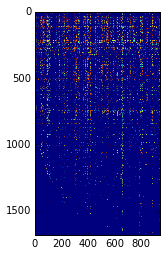

In [10]:
plt.imshow(Y) #can se the sparsity of data

#### Estimate $X$ and $\theta$ simultaneously

Apply gradient descent to compute $X$ and $\theta$ simultaneously. However in the following example, gradient descend failed to converge. So we will introduce alternative algorithm to estimate $X$ and $\theta$.

In [ ]:
def recom_gd(x, theta, y, R, alpha = 0.1, lamb = 1, numIterations = 100, thres = 0.001):
    J1 = 0.
    J2 = 100.
    for iter in range(numIterations):
        if abs(J2 - J1) < thres:
            break
        J2 = J1
        hypothesis = np.dot(x, theta.T)
        loss = hypothesis - y         
        J1 = np.sum(loss ** 2 * R) / 2
        x_grad = np.dot(loss * R, theta)
        theta_grad = np.dot((loss * R).T, x)
        if lamb > 0:
            J1 = J1 + lamb * np.sum(theta ** 2)/2 + lamb * np.sum(x ** 2)/2
            x_grad = x_grad + lamb * x
            theta_grad = theta_grad + lamb * theta
        print "iter %s | J: %.3f" % (iter, J1)              
        theta = theta - alpha * theta_grad  # update
        x = x - alpha * x_grad
    return (theta, x)

However in the following example, gradient descend failed to converge. So we will introduce an alternative algorithm to estimate $X$ and $\theta$.

In [ ]:
# This cannot work!!
def recom_cost(init, y, R, Nm, lamb):
    x = init[:Nm, :]
    theta = init[Nm:, :]
    hypothesis = np.dot(x, theta.T)
    loss = hypothesis - y         
    J = np.sum(loss ** 2 * R) / 2
    if lamb > 0:
        J = J + lamb * np.sum(theta ** 2)/2 + lamb * np.sum(x ** 2)/2
    return J  
def recom_grad(init, y, R, Nm, lamb): 
    x = init[:Nm, :]
    theta = init[Nm:, :]
    hypothesis = np.dot(x, theta.T)
    loss = hypothesis - y         
    x_grad = np.dot(loss * R, theta)
    theta_grad = np.dot((loss * R).T, x)
    if lamb > 0:
        x_grad = x_grad + lamb * x
        theta_grad = theta_grad + lamb * theta
    grad = np.concatenate((x_grad, theta_grad))
    return grad

init = np.concatenate((X, theta))  
res = fmin_bfgs(recom_cost, init, fprime = recom_grad, args=(Y, R, Y.shape[0], 0))

We firstly initialize $X$ and $\theta$.

In [ ]:
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10
X = np.random.normal(size = (num_movies, num_features))
theta = np.random.normal(size = (num_users, num_features))

We can normalize rates by rows (movies). We can use this mean when we deal with cold starts.

In [ ]:
def rates_nomalize(Y, R):
    m = Y.shape[0]
    Ymean = np.zeros(m)
    Ynorm = Y
    for i in range(m):
        idx = R[i, :] == 1
        Ymean[i] = np.mean(Y[i, idx])
        Ynorm[i, idx] = Y[i, idx] - Ymean[i]
    return (Ymean, Ynorm)

# Important Remarks

## Differences between `[R, ]` and `[R, 1]`

This differences cause one computation problem in the Sellecting threshold $\epsilon$ in Amormaly Detection section. The original input `p` has shape `[R, ]`. This will make pred has shape `[R, R]` instead of `[R, 1]`. The details of the differences can be referred to [page](http://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r).